### Python script for anomaly plot by Frank 

In [1]:
import pymannkendall as mk
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from descartes import PolygonPatch
import matplotlib.path as mplPath
import matplotlib.pyplot as plt
## for plotting a polygon
from shapely.geometry.polygon import Polygon
import geopandas as gpd
import shapefile as shp
import regionmask

C:\Users\Samuel-NUIST\anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [9]:
#ds = xr.open_dataset('C:/JRA55_temp/Frank_chirps/chirps_SOND_mean.nc')
ds = xr.open_dataset('C:/JRA55_temp/Frank_chirps/chirps_rwa_std_1983-2021.nc')
#ds

In [10]:
sf = gpd.read_file('D://Folder_2023//GIS_DATA//Rwanda//RWA_adm0.shp')  ## Used in Masking
sf2 = shp.Reader('D://Folder_2023//GIS_DATA//Rwanda//RWA_adm1.shp')       ## Used in plotting

In [11]:
## Mask to the shapefile
ds1 = regionmask.mask_3D_geopandas(sf, ds.X, ds.Y, lon_name='X', lat_name='Y')
ds2 = ds.where(ds1)

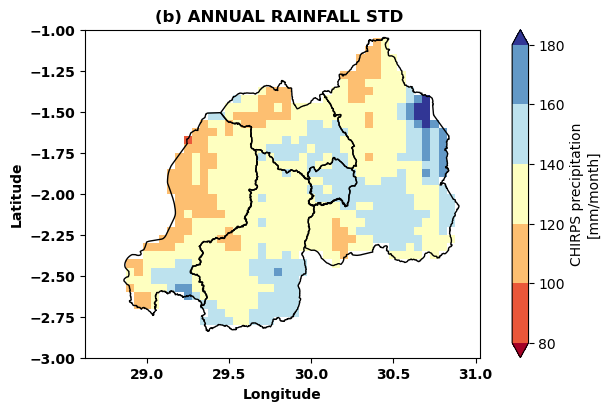

In [15]:
from matplotlib.colors import ListedColormap
none_map = ListedColormap(['none'])
fig, ax = plt.subplots(constrained_layout=True, figsize=(6, 4))

## Plotting the figure
for poly in sf2.shapes():
    poly_geo=poly.__geo_interface__
    ax.add_patch(PolygonPatch(poly_geo, fc='None', ec='black', alpha=1, fill='False', zorder=2))

ds2.precipitation.plot(cmap=plt.cm.RdYlBu,extend='both',levels=np.arange(80, 200, 20))
plt.ylabel('Latitude',fontsize=10, fontweight='bold')
plt.xlabel('Longitude',fontsize=10, fontweight='bold')
plt.title('(b) ANNUAL RAINFALL STD ',fontsize=12, fontweight='bold')
plt.xticks(size = 10, fontweight='bold')
plt.yticks(size = 10, fontweight='bold')
#plt.subplots_adjust(bottom=0.08, right=0.8, top=0.8)
#fig.colorbar(cs, ax=ax,cax = plt.axes([0.85, 0.1, 0.018, 0.6]), label='Seasonal Rainfall(mm/month)')
plt.savefig("C:/JRA55_temp/Frank_SST_ENSO/ANNUAL_STD.jpeg", dpi=300)